In [67]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
from glob import glob 
import random 
import os
from PIL import Image

AUTOTUNE = tf.data.AUTOTUNE


In [2]:
# paths = '20220318/dataset'
paths = 'dataset'
# image_path = os.path.join(paths)
images = glob(paths + '/*/*')
# imagesbb

In [3]:
RES = 100 
N_CLASS = 10
BATCH_SIZE = 64

# 26179 images 
N_TRAIN = 20000
N_VAL = 6179 

class_list = ['cavallo',
 'pecora',
 'elefante',
 'gatto',
 'scoiattolo',
 'gallina',
 'ragno',
 'mucca',
 'cane',
 'farfalla']

In [28]:
import pathlib

paths = pathlib.Path(paths)

In [34]:
images[:3]

['dataset\\cane\\OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg',
 'dataset\\cane\\OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg',
 'dataset\\cane\\OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg']

In [43]:
str(paths/'*/*')

'dataset\\*\\*\\*'

In [57]:
list_ds = tf.data.Dataset.list_files(str(paths/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(len(images), reshuffle_each_iteration=False) 

In [58]:
for f in list_ds.take(5):
    print(f.numpy())

b'dataset\\cane\\OIP-tdl9VsK25uYo-l8PLKSROgHaG0.jpeg'
b'dataset\\elefante\\OIP-N-95z5ed11Nie1-rXMLtGAHaE6.jpeg'
b'dataset\\ragno\\OIP-ijY2qW66B_nnwCRpuZBThAHaJ4.jpeg'
b'dataset\\farfalla\\ea36b40a2ef5073ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg'
b'dataset\\gallina\\OIP-kFt6_7dgVc6jamJ8xCZgJQHaFB.jpeg'


In [59]:
class_names = np.array(sorted([item.name for item in paths.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)

['cane' 'cavallo' 'elefante' 'farfalla' 'gallina' 'gatto' 'mucca' 'pecora'
 'ragno' 'scoiattolo']


In [60]:
val_size = int(len(images) * 0.2)
train_ds = list_ds.skip(val_size) 
val_ds = list_ds.take(val_size)

In [62]:
for f in train_ds.take(1):
    print(f) 

tf.Tensor(b'dataset\\gatto\\ea34b90c28f4013ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg', shape=(), dtype=string)


In [69]:
def get_label(file_path): 
    # return file_path.split('\\')[1]
    parts = tf.strings.split(file_path, os.path.sep)
    one_hot = parts[1] == class_names
    
    return tf.argmax(one_hot)

In [77]:
def decode_img(img): 
    # img = Image.open(img).convert('RGB').resize((RES, RES))
    # img = np.array(img)
    img = tf.io.decode_jpeg(img, channels=3) 
    return tf.image.resize(img, [RES, RES])
    

In [78]:
def process_path(file_path): 
    lbl = get_label(file_path) 
    
    # img = Image.open(img).convert('RGB').resize((RES, RES))
    # img = np.array(img) 
    img = tf.io.read_file(file_path) 
    img = decode_img(img)
    
    return img, lbl

In [79]:
train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE) 
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE) 

In [80]:
def config_perform(ds): 
    ds = ds.cache() 
    ds = ds.shuffle(buffer_size=1000) 
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    
    return ds

train_ds = config_perform(train_ds)
val_ds = config_perform(val_ds)

tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)


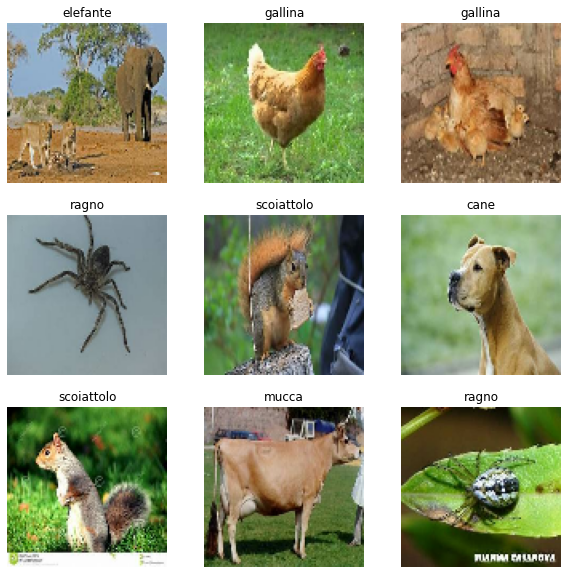

In [92]:
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    print(label)
    plt.title(class_names[label])
    plt.axis("off")

#

# Old Version Start

In [4]:
def to_categorical(classes):
    idx = class_list.index(classes)
    return np.array(tf.keras.utils.to_categorical(idx,10), dtype=np.uint8)

In [5]:
train_images = [] 
train_labels = [] 

test_images = [] 
test_labels = [] 

In [6]:
ttest = np.array(Image.open('dataset\\cane\\OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg').convert('RGB').resize((RES, RES)))

ttest.min(), ttest.max()

(0, 254)

In [7]:
for image in images[:N_TRAIN]: 
#     print(image)
    img = Image.open(image).convert('RGB').resize((RES, RES))
    img = np.array(img) / 254. 
    
    lbl = image.split('\\')[1]
    lbl = to_categorical(lbl)
    # lbl = class_list.index(lbl)
    
    train_images.append(img) 
    train_labels.append(lbl) 
    

In [8]:
for image in images[N_TRAIN:]: 
    img = Image.open(image).convert('RGB').resize((RES, RES))
    img = np.array(img) / 254. 
    
    lbl = image.split('\\')[1]
    lbl = to_categorical(lbl)
    # lbl = class_list.index(lbl)
    
    test_images.append(img) 
    test_labels.append(lbl) 
    

In [9]:
train_images = np.array(np.reshape(train_images, (len(train_images), RES, RES, 3)))
train_labels = np.array(np.reshape(train_labels, (len(train_labels), 10)))

test_images = np.array(np.reshape(test_images, (len(test_images), RES, RES, 3)))
test_labels = np.arrayval_ds (np.reshape(test_labels, (len(test_labels), 10)))
    
    
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((20000, 100, 100, 3), (20000, 10), (6179, 100, 100, 3), (6179, 10))

In [10]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
train_ds = train_ds.shuffle(100).batch(BATCH_SIZE, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

In [ ]:
# def preprocessing(image, label):
#     # image = tf.cast(image / 255., tf.uint8) 
#     image = tf.cast(image / 255., tf.uint8) 
# #     print(image.dtype, label.dtype)
#     return image, label

def aug(image, label):
    image = tf.image.random_crop(image, [RES, RES, 3])
    image = tf.image.random_flip_left_right(image)
    return image, label

In [ ]:
train_ds = train_ds.map(aug).shuffle(100).batch(BATCH_SIZE, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(aug).batch(BATCH_SIZE, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

# Old version End

In [81]:
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
mobilenetv3 = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(RES, RES, 3))

In [82]:
def create_model():
    inputs = tf.keras.Input(shape=(RES, RES, 3))
    x = preprocess_input(inputs) 
    x = mobilenetv3(x) 
    x = tf.keras.layers.GlobalAveragePooling2D()(x) 
    x = tf.keras.layers.Dense(N_CLASS)(x)
    x = tf.keras.layers.BatchNormalization()(x) 
    x = tf.keras.layers.Softmax()(x)
    model = tf.keras.Model(inputs=inputs, outputs=x)
    
    return model

In [83]:
model = create_model()

In [84]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 MobilenetV3small (Functiona  (None, 4, 4, 576)        939120    
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 576)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                5770      
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                             

In [93]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [94]:
hist = model.fit(train_ds, epochs=30, validation_data=val_ds)

Epoch 1/30
328/328 [==============================] - 222s 629ms/step - loss: 0.9494 - accuracy: 0.7363 - val_loss: 1.1870 - val_accuracy: 0.6290
Epoch 2/30
328/328 [==============================] - 18s 55ms/step - loss: 0.5798 - accuracy: 0.8484 - val_loss: 1.1505 - val_accuracy: 0.6415
Epoch 3/30
328/328 [==============================] - 18s 55ms/step - loss: 0.4317 - accuracy: 0.8858 - val_loss: 1.0970 - val_accuracy: 0.6772
Epoch 4/30
328/328 [==============================] - 18s 54ms/step - loss: 0.3367 - accuracy: 0.9103 - val_loss: 0.8248 - val_accuracy: 0.7549
Epoch 5/30
328/328 [==============================] - 19s 57ms/step - loss: 0.2651 - accuracy: 0.9304 - val_loss: 1.1543 - val_accuracy: 0.6579
Epoch 6/30
328/328 [==============================] - 18s 55ms/step - loss: 0.2252 - accuracy: 0.9411 - val_loss: 0.7896 - val_accuracy: 0.7725
Epoch 7/30
328/328 [==============================] - 18s 54ms/step - loss: 0.1823 - accuracy: 0.9527 - val_loss: 1.0785 - val_accurac

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()